In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as im
import os
import cv2
import pandas as pd

n =int(input("請選擇想顯示之圖片編號(1~20):"))
while n<0 or n>20:
    print("編號錯誤")
    n=int(input("請重新選擇想顯示之圖片編號(1~20):"))

請選擇想顯示之圖片編號(1~20):1


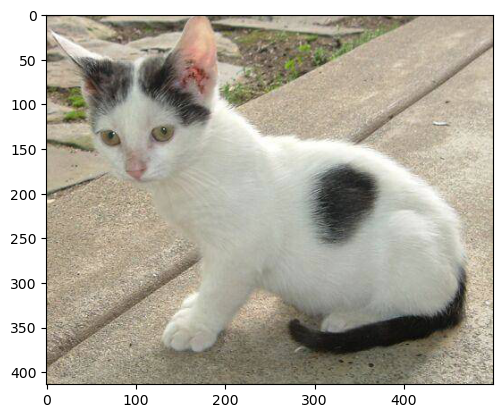

In [2]:
picture_path=[]
picture_name=[]
catnumber=0
dognumber=0
path='./test/'
path2='./reference/cats'
path3='./reference/dogs'
for img in os.listdir(path):
    image = im.imread(os.path.join(path,img))
    if img=="pic"+str(n)+".jpg":
        image = im.imread(os.path.join(path,img))
        target=cv2.resize(image,(64,64))
        plt.imshow(image)


In [3]:
for img in os.listdir(path2):
    imgpath = os.path.join(path2,img)
    picture_path.append(imgpath)
    picture_name.append(img)
for img in os.listdir(path3):
    imgpath = os.path.join(path3,img)
    picture_path.append(imgpath)
    picture_name.append(img)
picture=[im.imread(str(file)) for file in picture_path]
picture_resize = [cv2.resize(im.imread(str(file)), (64, 64)) for file in picture_path]

distance_list=[]
for P,A,B in zip(picture_resize,picture_name,picture):
    distance=0
    q=target.flatten()
    p=P.flatten()
    for i,j in zip(q,p):
        distance+=abs(int(i)-int(j))
    distance = distance *(1/(64*64*3))
    distance_list.append((distance,A,B))

It's cat!


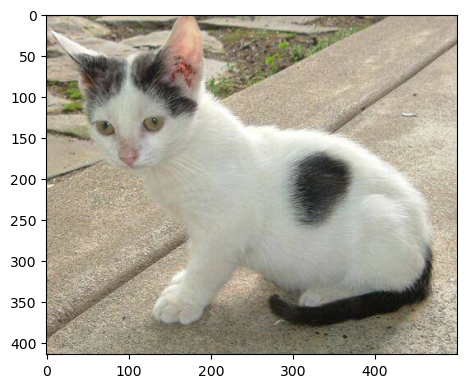

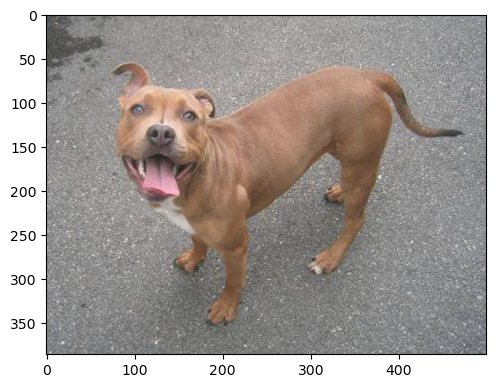

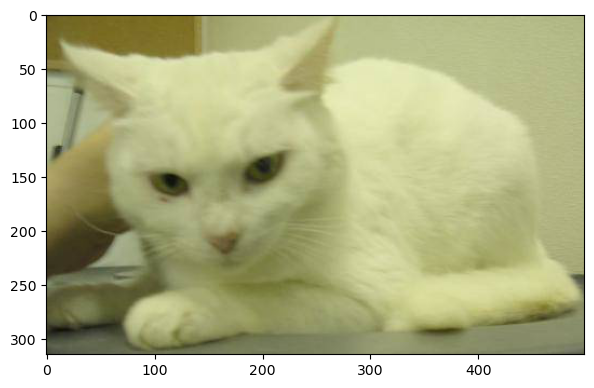

In [4]:
import pandas as pd
SDL = pd.DataFrame(distance_list)
SDL.sort_values(by=0,inplace=True)
sorted_distance_list =SDL
#print(sorted_distance_list)

for i in range(3):
    plt.figure(figsize=(15, 15))
    plt.subplot(3,1,i+1)
    plt.imshow(sorted_distance_list.iloc[i][2])
    if "cat" in sorted_distance_list.iloc[i][1]:
        catnumber+=1
    else:
        dognumber+=1
if catnumber>=dognumber:
    print("It's cat!")
else:
    print("It's dog!")
